In [1]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask_ml.cluster

In [2]:
from dask.distributed import Client


In [3]:
import matplotlib.pyplot as plt

In [4]:
clustering_on = ["Normalized_Rank", "Median_score"]
upper_n_clusters = 5
num_of_workers = 1

In [5]:
df = pd.read_csv('../data/sample_processed.csv')
ddf = dd.from_pandas(df, npartitions=num_of_workers * 4)

In [35]:
import imp

clustering = imp.load_source('clustering', '../src/cluster_analysis.py')

**Clustering**

In [7]:
client = Client()

In [8]:
data = ddf[clustering_on].compute(num_workers=num_of_workers)

In [9]:
ddf, silhouette_avgs, num_of_clusters_to_fit = clustering.cluster_analysis(
    data, ddf, clustering_on, upper_n_clusters, num_of_workers
)

In [10]:
sample_frac = 0.6

In [ ]:
sample = ddf.sample(frac=sample_frac)

In [36]:
clustering.draw_clusters_plot(sample, upper_n_clusters, '')

**Random Forest**

In [38]:
features = [
    "CC_to_C_rate",
    "CD_to_C_rate",
    "DC_to_C_rate",
    "DD_to_C_rate",
    "SSE",
    "Makes_use_of_game",
    "Makes_use_of_length",
    "Stochastic",
    "Cooperation_rating",
    "Cooperation_rating_max",
    "Cooperation_rating_min",
    "Cooperation_rating_median",
    "Cooperation_rating_mean",
    "Cooperation_rating_comp_to_max",
    "Cooperation_rating_comp_to_min",
    "Cooperation_rating_comp_to_median",
    "Cooperation_rating_comp_to_mean",
]

In [45]:
import dask.array as da
import operator

In [46]:
chosen_n_cluster = max(silhouette_avgs.items(), key=operator.itemgetter(1))[
    0
]

In [47]:
X = da.array(ddf[features].compute(num_workers=num_of_workers))
y = da.array(ddf[chosen_n_cluster].compute(num_workers=num_of_workers))

random_forest, importances, std, indices = clustering.random_forest_analysis(
    X, y, num_of_workers
)

In [70]:
features_labels = {"CC_to_C_rate": "$CC$ to $C$ rate",
                   "CD_to_C_rate": "$CD$ to $C$ rate",
                   "DC_to_C_rate": "$DC$ to $C$ rate",
                   "DD_to_C_rate": "$DD$ to $C$ rate",
                   "SSE": "SSE",
                   "Makes_use_of_game": "Make use of game",
                   "Makes_use_of_length": "Make use of lenght",
                   "Stochastic": "stochastic",
                    "Cooperation_rating": r"$C_r$",
                    "Cooperation_rating_max": r"$C_{max}$",
                    "Cooperation_rating_min": r"$C_{min}$",
                    "Cooperation_rating_median": r"$C_{median}$",
                    "Cooperation_rating_mean": r"$C_{mean}$",
                    "Cooperation_rating_comp_to_max": r"$C_r$ / $C_{max}$ ",
                    "Cooperation_rating_comp_to_min": r"$C_r$ / $C_{min}$",
                    "Cooperation_rating_comp_to_median": r"$C_r$ / $C_{median}$",
                    "Cooperation_rating_comp_to_mean": r"$C_r$ / $C_{mean}$"}

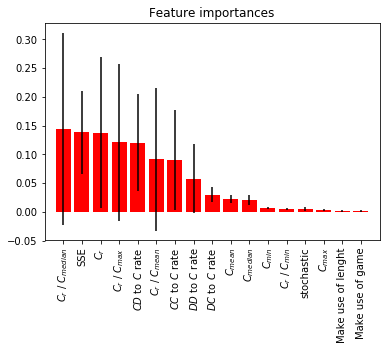

In [71]:
# def draw_feature_importance_bar_plot(
#     X, importances, std, indices, features, output_directory
# ):
plt.figure()
plt.title("Feature importances")
plt.bar(
    range(X.shape[1]),
    importances[indices],
    color="r",
    yerr=std[indices],
    align="center",
)

xticks = [features[f] for f in indices]
labels = [features_labels[feature] for feature in xticks]

plt.xticks(range(X.shape[1]), labels, rotation=90)
plt.xlim([-1, X.shape[1]]);
#     plt.savefig(
#         "%sfeature_importance_bar_plot.pdf" % output_directory,
#         bbox_inches="tight",
#     )

In [53]:
range(X.shape[1])

range(0, 17)